# Assignment 9
## Gavrilov Mikhail, Korobkov Roman
## 13.05.2019

## Part 1. Matlab to python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Transform the coordinates (X1) of satellite A or B into the HEEQ system 
# Fi - Heliographic (HEEQ) longitude, degrees 
# Theta - Heliographic (HEEQ) latitude, degrees
def to_HEEQ(x1, fi, theta):
    x=x1*np.cos(fi)*np.cos(theta)
    y=x1*np.sin(fi)*np.cos(theta)
    z=x1*np.sin(theta)
    return (x, y, z)

In [3]:
# Find radiuses of circle at the Sun parallels
# rad - radius in pixels

def rad_parallel_cut(rad):
    out=np.zeros((2*rad+1, 1))
    for it in range(1, rad+1):
        out[it]=np.round(np.sqrt((rad**2-(rad-it+1)**2)))
    out[rad+1:]=np.flip(out[0:rad], 0)
    return out

In [4]:
# Transormation of coordinates of point(X1,Y1,Z1) in a system of a satellite to HEEQ 
# Fi - Heliographic (HEEQ) longitude, degrees 
# Theta - Heliographic (HEEQ) latitude, degrees
def point_sat_to_HEEQ(Fi,Theta,X1,Y1,Z1):
    X=np.cos(Fi)*np.cos(Theta)*X1-np.sin(Fi)*Y1-np.cos(Fi)*np.sin(Theta)*Z1
    Y=np.sin(Fi)*np.cos(Theta)*X1+np.cos(Fi)*Y1-np.sin(Theta)*np.sin(Fi)*Z1
    Z=np.sin(Theta)*X1+np.cos(Theta)*Z1
    return (X, Y, Z)

In [5]:
# Transormation of coordinates of a point (in HEEQ) to the coordinate system of a satellite 
# Fi - Heliographic (HEEQ) longitude, degrees 
# Theta - Heliographic (HEEQ) latitude, degrees 

def HEEQ_to_point_sat(Fi,Theta,X1,Y1,Z1):
    X=np.cos(Fi)*np.cos(Theta)*X1+np.sin(Fi)*np.cos(Theta)*Y1+np.sin(Theta)*Z1
    Y=-np.sin(Fi)*X1+np.cos(Fi)*Y1
    Z=-np.cos(Fi)*np.sin(Theta)*X1-np.sin(Fi)*np.sin(Theta)*Y1+np.cos(Theta)*Z1
    return (X, Y, Z)

In [6]:
# Detetrime pixel coordinates (i,j) from  the Cartesian coordinates 
# rad - radius of Sun in pixels
# dist_top  - Distance from the top (grid start) to the Sun from the top
# nanleft - Part of the grid on the left that does not cover the Sun 
# Y,Z - Cartesian coordinates 
# R - radius of Sun atmosphere in km
# rad_circle - radiuses of circles at Sun parallels
def coord_real_to_pixel(rad, dist_top,nanleft, rad_circle, Y, Z, R):
    i=rad+dist_top-int(Z*(rad*1./R))
    j=int(nanleft[i-dist_top][0]+rad_circle[i-dist_top][0]+Y*(rad*1./R))
    return (i, j)

In [7]:
# Detetrime Cartesian coordinates of a point (M,N) in the coordinate system of a satellite (in km)
# nanleft  - Part of the grid on the left that does not cover the Sun 
# dist_top - Distance from the top (grid start) to the Sun from the top 
# rad_circle -radiuses of circles at Sun parallels 
# R - radius of Sun atmosphere  in km
# rad - radius of Sun in pixels
def coord_pixel_to_real(i,j,nanleft,dist_top,rad_circle,R,rad):
    Y=(j-nanleft[i-dist_top][0]-rad_circle[i-dist_top][0])*(R*1./rad)
    Z=(-(i-rad-dist_top))*(R*1./rad)
    X=np.sqrt(R**2-Y**2-Z**2)
    return (X, Y, Z)

In [8]:

####################################################

au = 149597870.691 #km
sr = 701407 #km

Xc = 700
Yc = 700

Ra = 630
Rb = 593
Fia = 20.620 * np.pi/180
Fib = -21.424 * np.pi/180
Tetaa = -2.535 * np.pi/180
Tetab = 3.089 * np.pi/180
Dista = 0.966587 * au
Distb = 1.026675 * au
Rad_circlea = rad_parallel_cut(Ra)
Rad_circleb = rad_parallel_cut(Rb)
Dist_topa = Yc-Ra
Dist_topb = Yc-Rb
Nanlefta = Xc - Rad_circlea
Nanleftb = Xc - Rad_circleb

####################################################


## Part 2. Image:

### Now let's open data file:

In [9]:
def mashtab (arr, maximum, minimum):
    ret = np.array(arr)
    ret[ret>maximum] = maximum
    ret[ret<minimum] = minimum
    return ret

In [10]:
Adata = np.array(pd.read_table('./data/txt/20071207_A_Dif_0435_0415.txt'))
Adata = Adata[:, :-1]
Bdata = np.array(pd.read_table('./data/txt/20071207_B_Dif_0435_0415.txt'))
Bdata = Bdata[:, :-1]

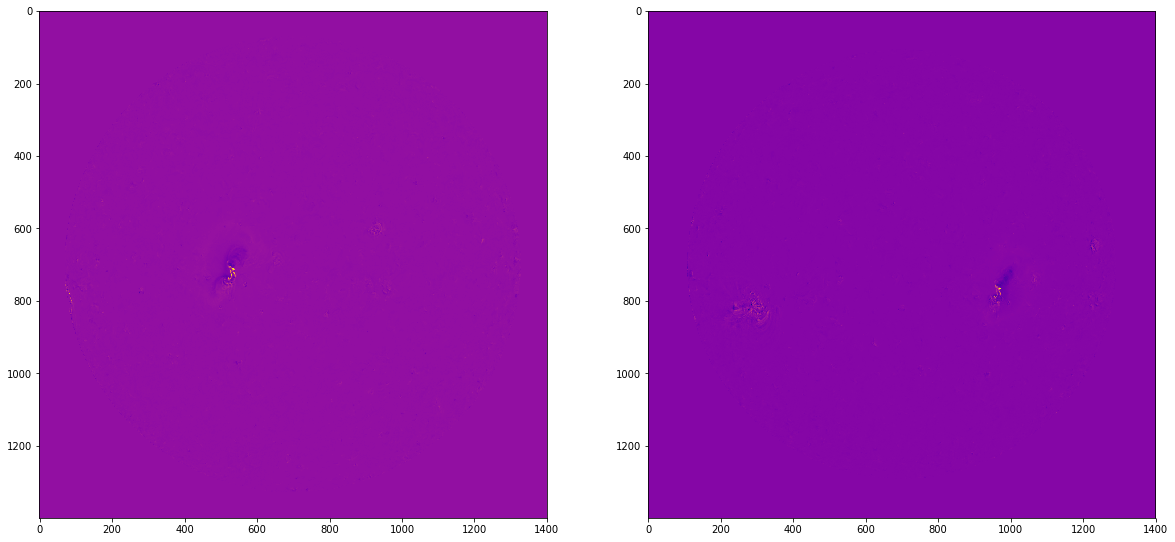

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(Adata, 'plasma')
plt.subplot(1, 2, 2)
plt.imshow(Bdata, 'plasma')
plt.show()

### Not very informative =) <br>
### Now let's cut the background and, after checking the histogram, change the scale of color.

In [12]:
Adata2 = Adata.copy()
Adata2[Adata2==0]=-700
Bdata2 = Bdata.copy()
Bdata2[Bdata2==0]=-700

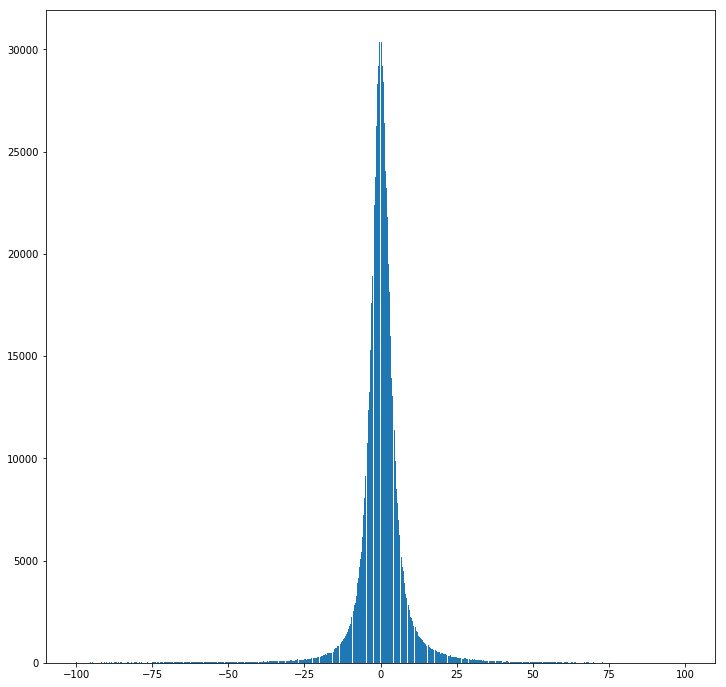

In [13]:
plt.figure(figsize=(12,12))
plt.hist(Adata2.flatten(), 1000, (-100, 100))
plt.show()

In [14]:
Adata3 = mashtab(Adata2, 50, -20)
Bdata3 = mashtab(Bdata2, 50, -20)

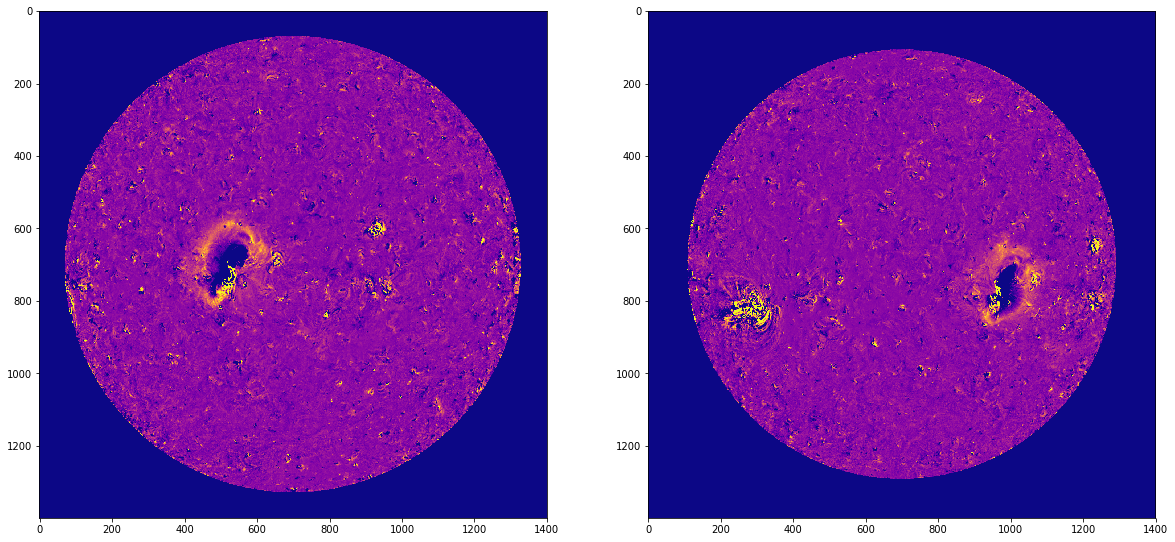

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(Adata3, 'plasma')
plt.subplot(1, 2, 2)
plt.imshow(Bdata3, 'plasma')
plt.show()

### Much better!
### Zoom in and choose few points:

In [16]:
i1b, j1b = (770, 951)
i2b, j2b = (755, 1020)
i3b, j3b = (651, 1004)
i4b, j4b = (855, 930)

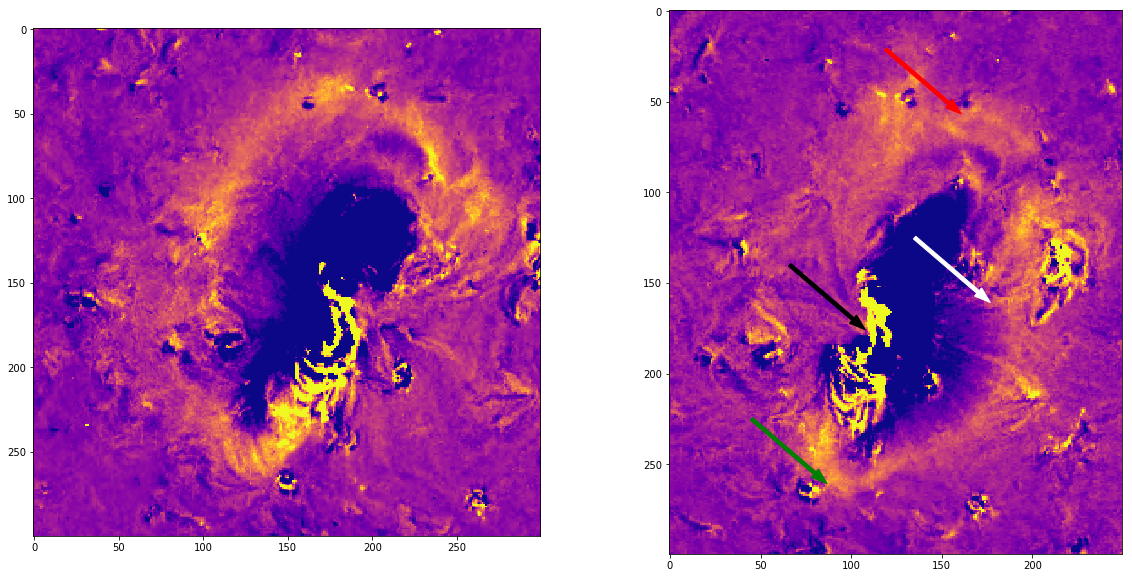

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(Adata3[550:850, 350:650], 'plasma')
plt.subplot(1, 2, 2)
plt.imshow(Bdata3[600:900, 850:1100], 'plasma')
plt.arrow(j1b-850-35, i1b-600-30, 35, 30, color = 'black', width = 2)
plt.arrow(j2b-850-35, i2b-600-30, 35, 30, color = 'white', width = 2)
plt.arrow(j3b-850-35, i3b-600-30, 35, 30, color = 'red', width = 2)
plt.arrow(j4b-850-35, i4b-600-30, 35, 30, color = 'green', width = 2)
plt.show()

### Using the provided and rewritten functions, we obtain the projections of these points on the image A:

In [18]:
def getline(i, j):
    x1_satB, y1_satB, z1_satB = coord_pixel_to_real(i, j, Nanleftb, Dist_topb, Rad_circleb, sr, Rb)
    x1_heeg, y1_heeg, z1_heeg = point_sat_to_HEEQ(Fib, Tetab, x1_satB, y1_satB, z1_satB)
    print x1_heeg, y1_heeg, z1_heeg
    x1_satA, y1_satA, z1_satA = HEEQ_to_point_sat(Fia, Tetaa, x1_heeg, y1_heeg, z1_heeg)
    i_A, j_A = coord_real_to_pixel(Ra, Dist_topa, Nanlefta, Rad_circlea, y1_satA, z1_satA, sr)
    xB_heeq, yB_heeq, zB_heeq = to_HEEQ(Distb, Fib, Tetab)
    xB_satA, yB_satA, zB_satA = HEEQ_to_point_sat(Fia, Tetaa, xB_heeq, yB_heeq, zB_heeq)
    xE = x1_satA + (xB_satA - x1_satA)*sr/Ra*0.000003
    yE = y1_satA + (yB_satA - y1_satA)*sr/Ra*0.000003
    zE = z1_satA + (zB_satA - z1_satA)*sr/Ra*0.000003
    ie_A, je_A = coord_real_to_pixel(Ra, Dist_topa, Nanlefta, Rad_circlea, yE, zE, sr)
    return i_A, j_A, ie_A, je_A

In [19]:
arr = []
arr.append(getline(i1b, j1b))
arr.append(getline(i2b, j2b))
arr.append(getline(i3b, j3b))
arr.append(getline(i4b, j4b))

698268.1666461556 44936.42518268604 -48724.37572116837
687090.4763213495 136994.15436627597 -33332.54666193298
685635.5364878738 117235.34060619357 90175.19429940401
684850.4188468623 23518.534362715844 -149661.49135868935


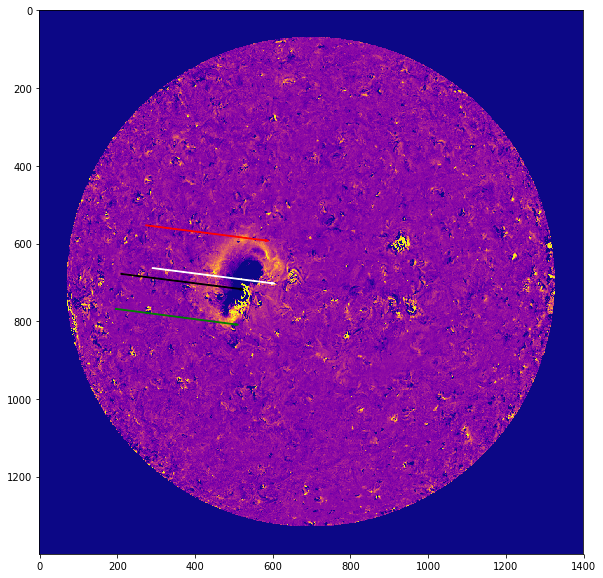

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(Adata3, 'plasma')
a, b, c, d = arr[0]
plt.arrow(d, c, b-d, a-c,  color = 'black', width = 2)
a, b, c, d = arr[1]
plt.arrow(d, c, b-d, a-c,  color = 'white', width = 2)
a, b, c, d = arr[2]
plt.arrow(d, c, b-d, a-c,  color = 'red', width = 2)
a, b, c, d = arr[3]
plt.arrow(d, c, b-d, a-c,  color = 'green', width = 2)
plt.show()

### On the obtained straight lines we denote the corresponding points on the image A:

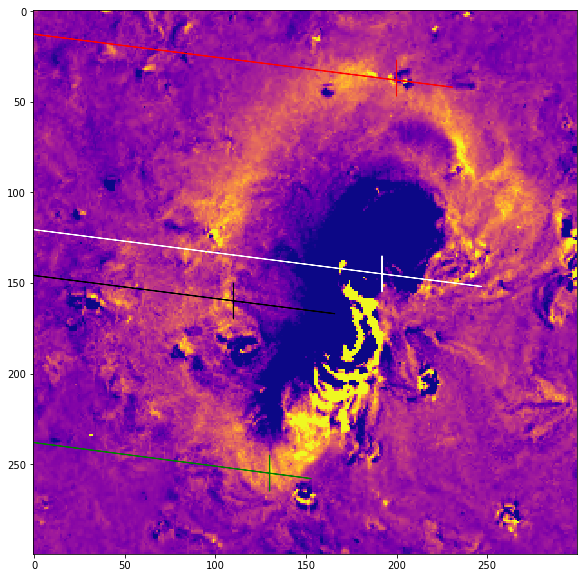

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(Adata3[550:850, 350:650], 'plasma')
a, b, c, d = arr[0]
a, b, c, d = a-550, b-350, c-550, d-350
plt.arrow(d, c, b-d, a-c,  color = 'black')#, width = 1)
a, b, c, d = arr[1]
a, b, c, d = a-550, b-350, c-550, d-350
plt.arrow(d, c, b-d, a-c,  color = 'white')#, width = 1)
a, b, c, d = arr[2]
a, b, c, d = a-550, b-350, c-550, d-350
plt.arrow(d, c, b-d, a-c,  color = 'red')#, width = 1)
a, b, c, d = arr[3]
a, b, c, d = a-550, b-350, c-550, d-350
plt.arrow(d, c, b-d, a-c,  color = 'green')#, width = 1)


plt.arrow(110, 150, 0, 20,  color = 'black',)
j1a = 110+350
plt.arrow(192, 135, 0, 20,  color = 'white')
j2a = 192+350
plt.arrow(200, 27, 0, 20,  color = 'red')
j3a = 200+350
plt.arrow(130, 245, 0, 20,  color = 'green')
j4a = 130+350
plt.show()

### We found one of the coordinates for these points. We find the second so that it belongs to the line:

To do this, consider the parametric equation of a line:<br><br>
$x = x_1 + t(x_2-x_1) => t = \frac {x-x_1}{x_2-x_1}$<br><br>
$y = y_1 + t(y_2-y_1) = y_1 + \frac {x-x_1}{x_2-x_1} (y_2-y_1)$

In [22]:
#точки в системе координат А

a, b, c, d = arr[0]
i1a = a + (j1a-b)/(d-b)*(c-a)
a, b, c, d = arr[1]
i2a = a + (j1a-b)/(d-b)*(c-a)
a, b, c, d = arr[2]
i3a = a + (j1a-b)/(d-b)*(c-a)
a, b, c, d = arr[3]
i4a = a + (j1a-b)/(d-b)*(c-a)

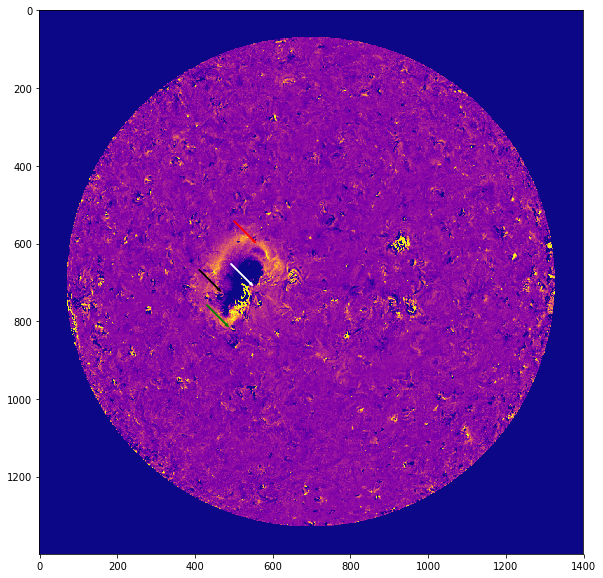

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(Adata3, 'plasma')
plt.arrow(j1a - 50, i1a-50, 50, 50,  color = 'black', width = 2)
plt.arrow(j2a - 50, i2a-50, 50, 50,  color = 'white', width = 2)
plt.arrow(j3a - 50, i3a-50, 50, 50,  color = 'red', width = 2)
plt.arrow(j4a - 50, i4a-50, 50, 50,  color = 'green', width = 2)
plt.show()

This image shows points with corresponding colors

#### Now we have: the location of a point on the image of satellite B (point M on the slides), the location of satellite B, the location of a point on the image of satellite A (point N on the slides), the location of satellite A.
#### Draw lines through the corresponding points and find their intersection (point C)

In [24]:
x1a, y1a, z1a = coord_pixel_to_real(i1a, j1a, Nanlefta, Dist_topa, Rad_circlea, sr, Ra)
x2a, y2a, z2a = coord_pixel_to_real(i2a, j2a, Nanlefta, Dist_topa, Rad_circlea, sr, Ra)
x3a, y3a, z3a = coord_pixel_to_real(i3a, j3a, Nanlefta, Dist_topa, Rad_circlea, sr, Ra)
x4a, y4a, z4a = coord_pixel_to_real(i4a, j4a, Nanlefta, Dist_topa, Rad_circlea, sr, Ra)

In [25]:
x1heeq, y1heeq, z1heeq = point_sat_to_HEEQ(Fia, Tetaa, x1a, y1a, z1a)
x2heeq, y2heeq, z2heeq = point_sat_to_HEEQ(Fia, Tetaa, x2a, y2a, z2a)
x3heeq, y3heeq, z3heeq = point_sat_to_HEEQ(Fia, Tetaa, x3a, y3a, z3a)
x4heeq, y4heeq, z4heeq = point_sat_to_HEEQ(Fia, Tetaa, x4a, y4a, z4a)
xa, ya, za = to_HEEQ(Dista, Fia, Tetaa)

In [26]:
x1_satB, y1_satB, z1_satB = coord_pixel_to_real(i1b, j1b, Nanleftb, Dist_topb, Rad_circleb, sr, Rb)
x1_heeq, y1_heeq, z1_heeq = point_sat_to_HEEQ(Fib, Tetab, x1_satB, y1_satB, z1_satB)

x2_satB, y2_satB, z2_satB = coord_pixel_to_real(i2b, j2b, Nanleftb, Dist_topb, Rad_circleb, sr, Rb)
x2_heeq, y2_heeq, z2_heeq = point_sat_to_HEEQ(Fib, Tetab, x2_satB, y2_satB, z2_satB)

x3_satB, y3_satB, z3_satB = coord_pixel_to_real(i3b, j3b, Nanleftb, Dist_topb, Rad_circleb, sr, Rb)
x3_heeq, y3_heeq, z3_heeq = point_sat_to_HEEQ(Fib, Tetab, x3_satB, y3_satB, z3_satB)

x4_satB, y4_satB, z4_satB = coord_pixel_to_real(i4b, j4b, Nanleftb, Dist_topb, Rad_circleb, sr, Rb)
x4_heeq, y4_heeq, z4_heeq = point_sat_to_HEEQ(Fib, Tetab, x4_satB, y4_satB, z4_satB)

xb, yb, zb = to_HEEQ(Distb, Fib, Tetab)

We have 2 points: $(x_1,y_1,z_1)$, $(x_2,y_2,z_2)$. Directing vector of line $\vec n = (x_2-x_1, y_2-y_1, z_2-z_1)$ <br>
All points of this line may be presented as $(x_1,y_1,z_1) + t * \vec n$<br>
Let's now find intersection of two lines for each coordinate: <br><br>
$x_i = x_1 + t(x_2-x_1) = x_3 + t(x_4-x_3)$ <br><br>
$t(x_2 - x_1 - x_4 + x_3) = x_3 - x_1$ <br><br>
$t = \frac{x_3 - x_1}{x_2 - x_1 - x_4 + x_3}$ <br><br>
$x_i = x_1 + t(x_2-x_1) = x_1 + \frac{x_3 - x_1}{x_2 - x_1 - x_4 + x_3} * (x_2-x_1)$ <br><br>
$x_i = \frac{x_2 x_3 - x_1 x_4}{x_2 - x_1 - x_4 + x_3}$ <br><br>
The same thing for all the other axis.

In [27]:
def intersection(x1,x2,x3,x4):
    return (x2*x3-x1*x4)*1.0/(x2+x3-x1-x4)

In [28]:
xc1 = intersection(xa, x1heeq, xb, x1_heeq)
yc1 = intersection(ya, y1heeq, yb, y1_heeq)
zc1 = intersection(za, z1heeq, zb, z1_heeq)

xc2 = intersection(xa, x2heeq, xb, x2_heeq)
yc2 = intersection(ya, y2heeq, yb, y2_heeq)
zc2 = intersection(za, z2heeq, zb, z2_heeq)

xc3 = intersection(xa, x3heeq, xb, x3_heeq)
yc3 = intersection(ya, y3heeq, yb, y3_heeq)
zc3 = intersection(za, z3heeq, zb, z3_heeq)

xc4 = intersection(xa, x4heeq, xb, x4_heeq)
yc4 = intersection(ya, y4heeq, yb, y4_heeq)
zc4 = intersection(za, z4heeq, zb, z4_heeq)

#### Intersection points found. Now we can get their height relative to the surface of the sun:

In [29]:
h1 = np.sqrt(xc1**2 + yc1**2 + zc1**2) - sr
h2 = np.sqrt(xc2**2 + yc2**2 + zc2**2) - sr
h3 = np.sqrt(xc3**2 + yc3**2 + zc3**2) - sr
h4 = np.sqrt(xc4**2 + yc4**2 + zc4**2) - sr

In [30]:
print "Black point's height = %.2f km" % h1
print "White point's height = %.2f km" % h2
print "Red point's height = %.2f km" % h3
print "Green point's height = %.2f km" % h4

Black point's height = 20449.40 km
White point's height = 173214.54 km
Red point's height = 91736.75 km
Green point's height = 10597.74 km


The white point is located much higher due to the fact that the substance at the selected edge was already practically detached from the sun, in connection with which this point does not carry much statistical significance, but is nonetheless just as interesting to be considered.